# Stock Market Analysis and Prediction

In [2]:
#Import the libraries 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


C:\Users\sushmita kumari\anaconda3\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote
df = web.DataReader('AAPL',data_source = 'yahoo' , start = '2012-01-01', end = '2020-02-14')
#show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-02-10,321.549988,313.850006,314.179993,321.549988,27337200.0,321.549988
2020-02-11,323.899994,318.709991,323.600006,319.609985,23580800.0,319.609985
2020-02-12,327.220001,321.470001,321.470001,327.200012,28432600.0,327.200012


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2043, 6)

# Visualize the closing price history

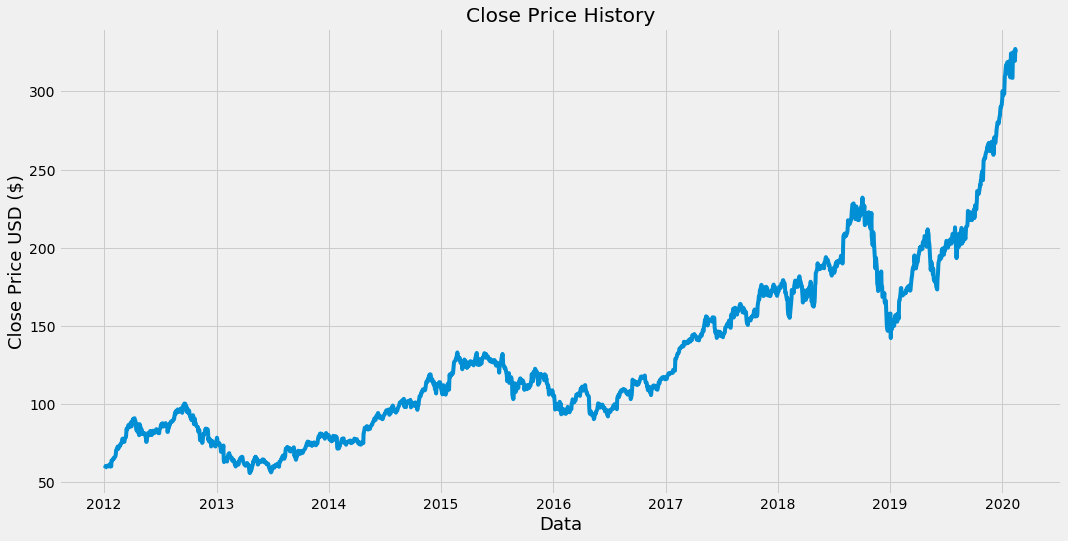

In [5]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create  new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1635

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [1.        ],
       [0.99141514],
       [0.99170996]])

In [25]:
#create the training data set
#Create the scaler training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()
        

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]



In [26]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [27]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1575, 60, 1)

# LSTM model

In [28]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
#Compile the model
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [30]:
#Train the model
model.fit(x_train, y_train , batch_size=1, epochs=1 )

Epoch 1/1
1575/1575 [==============================] - 186s 118ms/step - loss: 4.8520e-04


In [31]:
#create the testing data set
#create a new array containing scaled values from index 1575 to 2043
test_data = scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test =[]
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append (test_data[i-60:i,0])

In [32]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [33]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


In [34]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSE value

In [35]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.5094099231794769

# Visualize the Prediction of closing price history

C:\Users\sushmita kumari\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


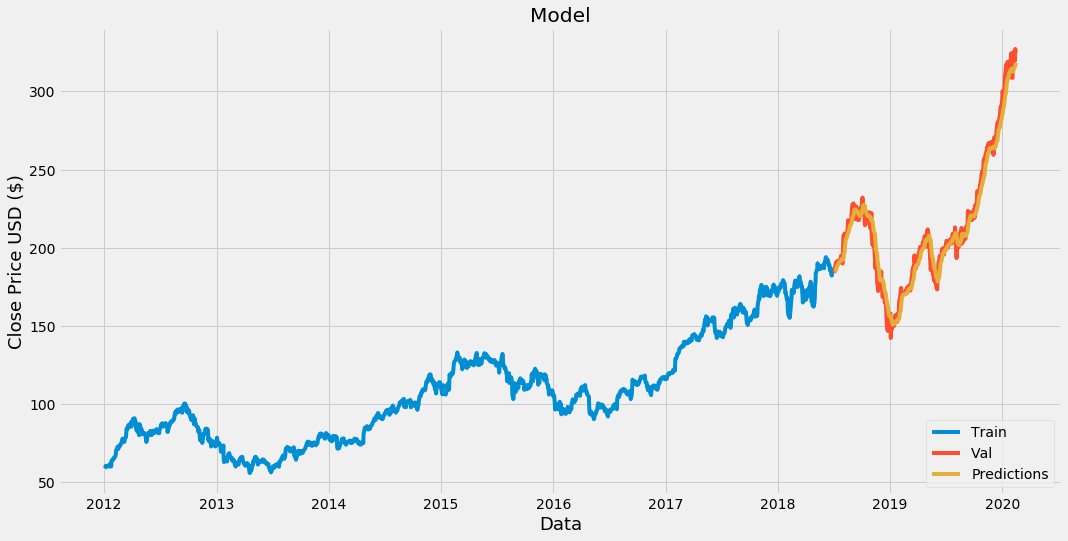

In [36]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [37]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-03,183.919998,185.424500
2018-07-05,185.399994,185.420929
2018-07-06,187.970001,185.471695
2018-07-09,190.580002,185.829956
2018-07-10,190.350006,186.596634
...,...,...
2020-02-10,321.549988,315.280396
2020-02-11,319.609985,316.017334
2020-02-12,327.200012,316.390076


# Comparison between real data and predicted data

In [38]:
#Get the quote 
apple_quote = web.DataReader('AAPL',data_source='yahoo',start ='2012-01-01' , end ='2020 - 02 - 14')
#Create a new data frame
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data  to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print("prediction close price:" ,pred_price)         # our prediction according to data of close price

prediction close price: [[319.13242]]


In [39]:
#Get the quote 
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start ='2020-02-14', end ='2020-02-14')
print(apple_quote2['Close'])
  

Date
2020-02-13    324.869995
2020-02-14    324.950012
Name: Close, dtype: float64
